In [16]:
# modules importing
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn

# eradicate warnings
import warnings
warnings.filterwarnings('ignore')

# Required Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.nan)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

print("pandas : {0}".format(pd.__version__))
print("numpy : {0}".format(np.__version__))
print("matplotlib : {0}".format(matplotlib.__version__))
print("seaborn : {0}".format(sns.__version__))
print("sklearn : {0}".format(sklearn.__version__))
print("imblearn : {0}".format(imblearn.__version__))

pandas : 0.22.0
numpy : 1.14.2
matplotlib : 2.1.2
seaborn : 0.8.1
sklearn : 0.20.0
imblearn : 0.3.1


In [17]:
# Dataset field names
datacols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

# train dataset
kdd_train = pd.read_table("KDDTrain.txt", sep=",", names=datacols) # 
kdd_train = kdd_train.iloc[:,:-1] # extra field removal

# test dataset
kdd_test = pd.read_table("KDDtest.txt", sep=",", names=datacols)
kdd_test = kdd_test.iloc[:,:-1]

In [18]:
# train data
print(kdd_train.head())

# dimension of train data
print('Train set dimension: {} rows, {} columns'.format(dfkdd_train.shape[0], dfkdd_train.shape[1]))

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   
4               0       0    0                  0          1                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0      

In [19]:
# View test data
kdd_test.head(3)

# test set dimension
print('Test set dimension: {} rows, {} columns'.format(dfkdd_test.shape[0], dfkdd_test.shape[1]))

Test set dimension: 22544 rows, 41 columns


In [20]:
mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }

In [21]:
# Attack feature mappings
kdd_train['attack_class'] = kdd_train['attack'].apply(lambda v: mapping[v])
kdd_test['attack_class'] = kdd_test['attack'].apply(lambda v: mapping[v])

In [22]:
# attack field dropping 
kdd_train.drop(['attack'], axis=1, inplace=True)
kdd_test.drop(['attack'], axis=1, inplace=True)

In [23]:
# View top 5 things in train set
kdd_train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,Normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal


In [24]:
# stats
kdd_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
kdd_train['num_outbound_cmds'].value_counts()
kdd_test['num_outbound_cmds'].value_counts()

0    22544
Name: num_outbound_cmds, dtype: int64

In [26]:
# 'num_outbound_cmds' field is removed because of redundancy.
kdd_train.drop(['num_outbound_cmds'], axis=1, inplace=True)
kdd_test.drop(['num_outbound_cmds'], axis=1, inplace=True)

print(dfkdd_test)

       duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0             0           tcp   private   REJ          0          0     0   
1             0           tcp   private   REJ          0          0     0   
2             2           tcp  ftp_data    SF      12983          0     0   
3             0          icmp     eco_i    SF         20          0     0   
4             1           tcp    telnet  RSTO          0         15     0   
5             0           tcp      http    SF        267      14515     0   
6             0           tcp      smtp    SF       1022        387     0   
7             0           tcp    telnet    SF        129        174     0   
8             0           tcp      http    SF        327        467     0   
9             0           tcp       ftp    SF         26        157     0   
10            0           tcp    telnet    SF          0          0     0   
11            0           tcp      smtp    SF        616        330     0   

In [27]:

# Attack Class in train and test sets 
attack_freq_train = kdd_train[['attack_class']].apply(lambda x: x.value_counts())
attack_freq_test = kdd_test[['attack_class']].apply(lambda x: x.value_counts())
attack_freq_train['frequency_percent_train'] = round((100 * attack_freq_train / attack_freq_train.sum()),2)
attack_freq_test['frequency_percent_test'] = round((100 * attack_freq_test / attack_freq_test.sum()),2)

attack_class_dist = pd.concat([attack_freq_train,attack_freq_test], axis=1) 
attack_class_dist

,attack_class,frequency_percent_train,attack_class,frequency_percent_test
DoS,45927,36.46,7458,33.08
Normal,67343,53.46,9711,43.08
Probe,11656,9.25,2421,10.74
R2L,995,0.79,2754,12.22
U2R,52,0.04,200,0.89


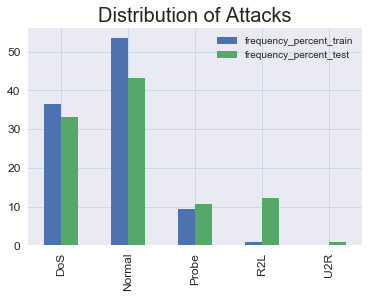

In [28]:
 #Attack class bar plot
plot = attack_class_dist[['frequency_percent_train', 'frequency_percent_test']].plot(kind="bar", );
plot.set_title("Distribution of Attacks", fontsize=20);
plot.grid(color='#A9CCE3', alpha=0.5);

In [29]:
kdd_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,Normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal


In [34]:
from sklearn.preprocessing import StandardScaler
st_scaler = StandardScaler()

# scale numerical attributes to get mean as zero and variance as one 
col = kdd_train.select_dtypes(include=['float64','int64']).columns
s_train = st_scaler.fit_transform(kdd_train.select_dtypes(include=['float64','int64']))
s_test = st_scaler.fit_transform(kdd_test.select_dtypes(include=['float64','int64']))

# result to dataframe again 
s_traindf = pd.DataFrame(s_train, columns = col)
s_testdf = pd.DataFrame(s_test, columns = col)


In [35]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
catrain = kdd_train.select_dtypes(include=['object']).copy()
catest = kdd_test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
trainca = catrain.apply(encoder.fit_transform)
testca = catest.apply(encoder.fit_transform)

# separate target column from encoded data 
entrain = trainca.drop(['attack_class'], axis=1)
entest = testca.drop(['attack_class'], axis=1)

ca_Ytrain = trainca[['attack_class']].copy()
ca_Ytest = testca[['attack_class']].copy()


In [36]:
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter

# define columns and extract encoded train set for sampling 
s_traindf = kdd_train.select_dtypes(include=['float64','int64'])
refclascol = pd.concat([s_traindf, entrain], axis=1).columns
refclas = np.concatenate((s_train, entrain.values), axis=1)
X = refclas

# reshape target column to 1D array shape  
c, r = ca_Ytest.values.shape
y_test = ca_Ytest.values.reshape(c,)

c, r = ca_Ytrain.values.shape
y = ca_Ytrain.values.reshape(c,)

# apply the random over-sampling
ros = RandomOverSampler(random_state=42)
X_re, y_re = ros.fit_sample(X, y)
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_re)))

Original dataset shape Counter({1: 67343, 0: 45927, 2: 11656, 3: 995, 4: 52})
Resampled dataset shape Counter({1: 67343, 0: 67343, 3: 67343, 2: 67343, 4: 67343})


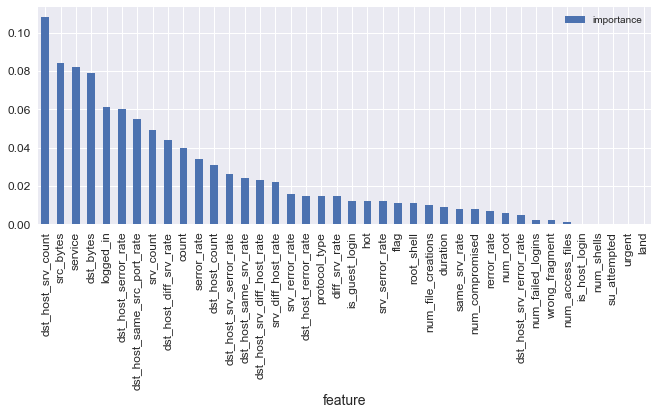

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

#random forest classifier fiiting to train data
rfc.fit(X_re, y_re);
# extract important features
score = np.round(rfc.feature_importances_,3)
important_features = pd.DataFrame({'feature':refclascol,'importance':score})
important_features = important_features.sort_values('importance',ascending=False).set_index('feature')
# important feature plotting
plt.rcParams['figure.figsize'] = (11, 4)
important_features.plot.bar();


In [42]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# RFE model and select 10 features 
rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_re, y_re)

# attributes selection summary 
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), refclascol)]
selected_final_features = [v for i, v in feature_map if i==True]

In [43]:
selected_final_features

['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'service']

In [45]:
# define columns to new dataframe
newcol = list(refclascol)
newcol.append('attack_class')

# add a dimension to target
new_y_re = y_re[:, np.newaxis]

# create a dataframe from sampled data
res_arr = np.concatenate((X_re, new_y_re), axis=1)
res_df = pd.DataFrame(res_arr, columns = newcol) 

# create test dataframe
reftest = pd.concat([s_testdf, testca], axis=1)
reftest['attack_class'] = reftest['attack_class'].astype(np.float64)
reftest['protocol_type'] = reftest['protocol_type'].astype(np.float64)
reftest['flag'] = reftest['flag'].astype(np.float64)
reftest['service'] = reftest['service'].astype(np.float64)

res_df.shape
reftest.shape

(22544, 41)

In [47]:
from collections import defaultdict
classdict = defaultdict(list)

# create two-target classes (normal class and an attack class)  
attacklist = [('DoS', 0.0), ('Probe', 2.0), ('R2L', 3.0), ('U2R', 4.0)]
normalclass = [('Normal', 1.0)]

def create_classdict():
    '''This function subdivides train and test dataset into two-class attack labels''' 
    for j, k in normalclass: 
        for i, v in attacklist: 
            restrain_set = res_df.loc[(res_df['attack_class'] == k) | (res_df['attack_class'] == v)]
            classdict[j +'_' + i].append(restrain_set)
            # test labels
            reftest_set = reftest.loc[(reftest['attack_class'] == k) | (reftest['attack_class'] == v)]
            classdict[j +'_' + i].append(reftest_set)
        
create_classdict()

In [48]:
for k, v in classdict.items():
    print(v)

[        duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
0      -0.110249  -0.007679  -0.004919 -0.014089       -0.089486 -0.007736   
1      -0.110249  -0.007737  -0.004919 -0.014089       -0.089486 -0.007736   
2      -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
3      -0.110249  -0.007723  -0.002891 -0.014089       -0.089486 -0.007736   
4      -0.110249  -0.007728  -0.004814 -0.014089       -0.089486 -0.007736   
5      -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
6      -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
7      -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
8      -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
9      -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
10     -0.110249  -0.007762  -0.004919 -0.014089       -0.089486 -0.007736   
11     -0.110249  -0.007762  -0.004919 -0.014089       -0.08948

[        duration  src_bytes  dst_bytes      land  wrong_fragment     urgent  \
0      -0.110249  -0.007679  -0.004919 -0.014089       -0.089486  -0.007736   
1      -0.110249  -0.007737  -0.004919 -0.014089       -0.089486  -0.007736   
3      -0.110249  -0.007723  -0.002891 -0.014089       -0.089486  -0.007736   
4      -0.110249  -0.007728  -0.004814 -0.014089       -0.089486  -0.007736   
12     -0.110249  -0.007713  -0.004359 -0.014089       -0.089486  -0.007736   
16     -0.110249  -0.007711  -0.001490 -0.014089       -0.089486  -0.007736   
18     -0.110249  -0.007723  -0.004765 -0.014089       -0.089486  -0.007736   
19     -0.110249  -0.007704  -0.004626 -0.014089       -0.089486  -0.007736   
22     -0.110249  -0.007719  -0.001958 -0.014089       -0.089486  -0.007736   
23      2.042559  -0.007737  -0.004893 -0.014089       -0.089486  -0.007736   
25      0.084413  -0.007688  -0.001332 -0.014089       -0.089486  -0.007736   
27     -0.110249  -0.007724  -0.003280 -0.014089   

In [50]:
prtrain = classdict['Normal_DoS'][0]
prtest = classdict['Normal_DoS'][1]
grpclass = 'Normal_DoS'
print(prtest )

       duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
0     -0.155534  -0.021988  -0.096896 -0.017624       -0.059104 -0.019459   
1     -0.155534  -0.021988  -0.096896 -0.017624       -0.059104 -0.019459   
2     -0.154113   0.005473  -0.096896 -0.017624       -0.059104 -0.019459   
5     -0.155534  -0.021423   0.587166 -0.017624       -0.059104 -0.019459   
6     -0.155534  -0.019826  -0.078657 -0.017624       -0.059104 -0.019459   
8     -0.155534  -0.021296  -0.074887 -0.017624       -0.059104 -0.019459   
11    -0.155534  -0.020685  -0.081344 -0.017624       -0.059104 -0.019459   
12    -0.155534  -0.021988  -0.096896 -0.017624       -0.059104 -0.019459   
13    -0.155534  -0.021988  -0.096896 -0.017624       -0.059104 -0.019459   
14    -0.129240  -0.020353  17.067107 -0.017624       -0.059104 -0.019459   
15    -0.155534  -0.021248   0.073236 -0.017624       -0.059104 -0.019459   
16    -0.155534  -0.021538  -0.065839 -0.017624       -0.059104 -0.019459   

In [53]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

Xresdf = prtrain 
newtest = prtest

Xresdfnew = Xresdf[selected_final_features]
Xresdfnum = Xresdfnew.drop(['service'], axis=1)
Xresdfcat = Xresdfnew[['service']].copy()
#print(Xresdfcat)
Xtest_features = newtest[selected_final_features]
Xtestdfnum = Xtest_features.drop(['service'], axis=1)
Xtestcat = Xtest_features[['service']].copy()


# Fit train data
#enc.fit(Xresdfcat)

#  train data transformation
X_train_1hotenc = Xresdfcat
     
# test data transformation 
X_test_1hotenc = Xtestcat
 
X_train = np.concatenate((Xresdfnum.values, X_train_1hotenc), axis=1)
X_test = np.concatenate((Xtestdfnum.values, X_test_1hotenc), axis=1) 

y_train = Xresdf[['attack_class']].copy()
c, r = y_train.values.shape
Y_train = y_train.values.reshape(c,)

y_test = newtest[['attack_class']].copy()
c, r = y_test.values.shape
Y_test = y_test.values.reshape(c,)


In [54]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# KNeighborsClassifier Model training
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

#  LogisticRegression Model training
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

#  Gaussian Naive Baye Model training
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)
            
#  Decision Tree Model training
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train);
            
# RandomForestClassifier Model  training
RF_Classifier = RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=0)
RF_Classifier.fit(X_train, Y_train);  




============================== Normal_DoS Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9489181990184218

Model Accuracy:
 0.9489182246113181

Confusion matrix, without normalization


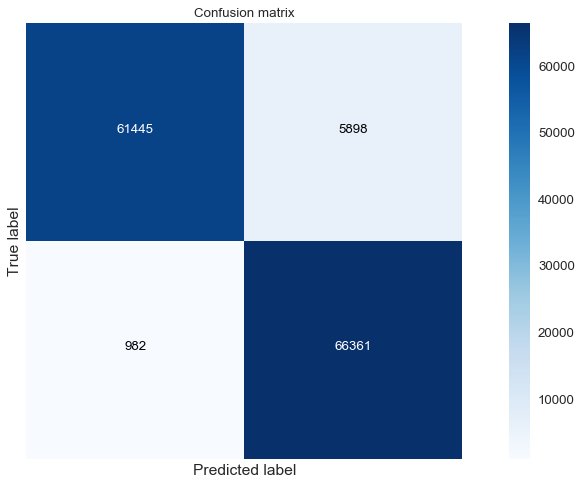


Classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.91      0.95     67343
         1.0       0.92      0.99      0.95     67343

   micro avg       0.95      0.95      0.95    134686
   macro avg       0.95      0.95      0.95    134686
weighted avg       0.95      0.95      0.95    134686



============================== Normal_DoS Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9996510444951425

Model Accuracy:
 0.9999480272634127

Confusion matrix, without normalization


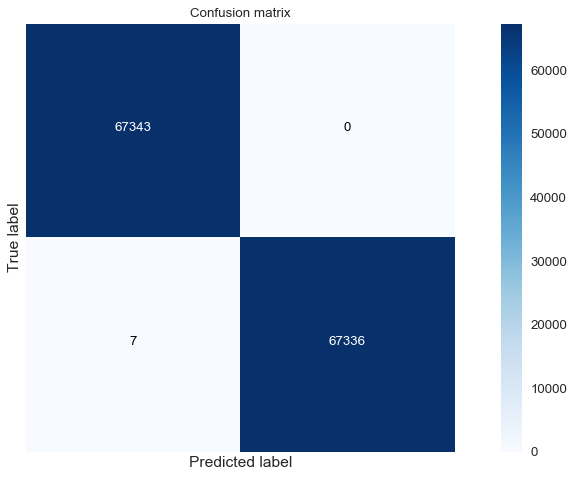


Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67343
         1.0       1.00      1.00      1.00     67343

   micro avg       1.00      1.00      1.00    134686
   macro avg       1.00      1.00      1.00    134686
weighted avg       1.00      1.00      1.00    134686



============================== Normal_DoS RandomForest Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9997549879843867

Model Accuracy:
 0.9999480272634127

Confusion matrix, without normalization


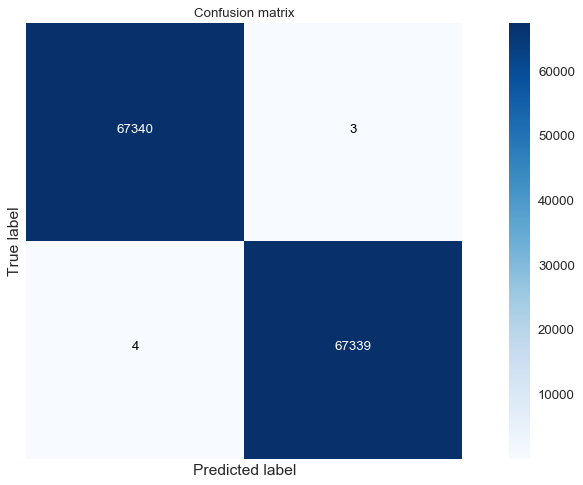


Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67343
         1.0       1.00      1.00      1.00     67343

   micro avg       1.00      1.00      1.00    134686
   macro avg       1.00      1.00      1.00    134686
weighted avg       1.00      1.00      1.00    134686



============================== Normal_DoS KNeighborsClassifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.996495569580202

Model Accuracy:
 0.9977577476500898

Confusion matrix, without normalization


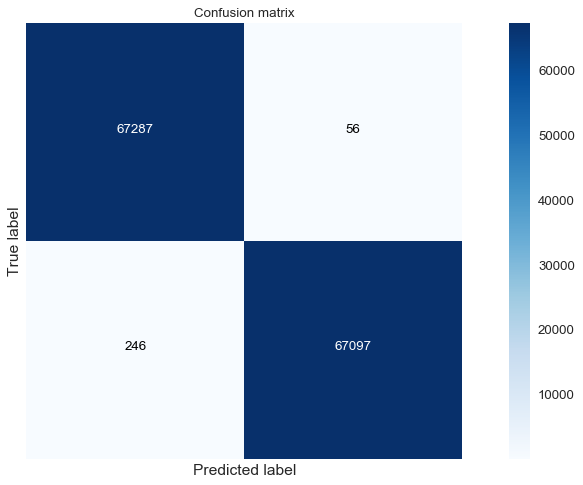


Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67343
         1.0       1.00      1.00      1.00     67343

   micro avg       1.00      1.00      1.00    134686
   macro avg       1.00      1.00      1.00    134686
weighted avg       1.00      1.00      1.00    134686



============================== Normal_DoS LogisticRegression Model Evaluation ==============================

Cross Validation Mean Score:
 0.9635225370748757

Model Accuracy:
 0.9635968103589089

Confusion matrix, without normalization


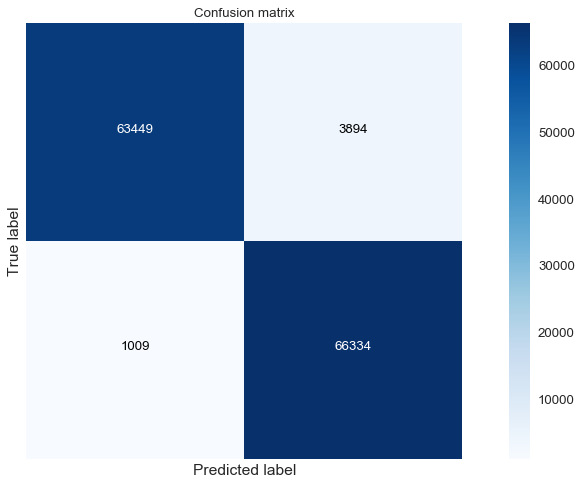


Classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.94      0.96     67343
         1.0       0.94      0.99      0.96     67343

   micro avg       0.96      0.96      0.96    134686
   macro avg       0.96      0.96      0.96    134686
weighted avg       0.96      0.96      0.96    134686




In [56]:
from sklearn import metrics

models = []

models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('RandomForest Classifier', RF_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))


def plot_confusion_matrix(cm, classesNames,printCM=False,normalize=False, title='Confusion matrix', cmap=plt.cm.Blues,figsize=(12,6),dpi=80):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    cm is the confusion matrix
    """
    plt.figure(figsize=figsize,dpi=dpi)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classesNames))
    plt.xticks(tick_marks, classesNames, rotation=45)
    plt.yticks(tick_marks, classesNames)

    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis],2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    if printCM==True:
        print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    c1 = metrics.confusion_matrix(Y_train, v.predict(X_train))
    

    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} {} Model Evaluation =============================='.format(grpclass, i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    plot_confusion_matrix(c1,[])
    print()
    print("Classification report:" "\n", classification) 
    print()

In [199]:
for i, v in models:
    accuracy = v.predict(X_test)
    print(accuracy)

[0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.

[0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.

[0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1.

[0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.

[0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1.
 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1.

In [58]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} {} Model Test Results =============================='.format(grpclass, i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Normal_DoS Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.8697070301124119

Confusion matrix:
 [[5357 2101]
 [ 136 9575]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.72      0.83      7458
         1.0       0.82      0.99      0.90      9711

   micro avg       0.87      0.87      0.87     17169
   macro avg       0.90      0.85      0.86     17169
weighted avg       0.89      0.87      0.87     17169



============================== Normal_DoS Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.8288776282835343

Confusion matrix:
 [[5829 1629]
 [1309 8402]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.82      0.78      0.80      7458
         1.0       0.84      0.87      0.85      9711

   micro avg       0.83      0.83      0.83     17169
   

In [59]:
#Serialization using pickle
import pickle
pickle.dump(KNN_Classifier, open("intrusion_knn.pkl","wb"))

knn_final_model = pickle.load(open("intrusion_knn.pkl","rb"))

In [60]:
knn_final_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [61]:

print(knn_final_model.predict(X_test))

[0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.

In [62]:
print(y_test)

       attack_class
0               0.0
1               0.0
2               1.0
5               1.0
6               1.0
8               1.0
11              1.0
12              0.0
13              0.0
14              1.0
15              1.0
16              1.0
17              1.0
18              1.0
19              0.0
20              0.0
22              1.0
23              1.0
24              0.0
25              0.0
26              1.0
27              1.0
28              0.0
29              1.0
30              0.0
31              1.0
32              1.0
33              1.0
36              1.0
38              1.0
...             ...
22508           1.0
22510           0.0
22511           1.0
22512           0.0
22514           1.0
22515           0.0
22516           1.0
22517           0.0
22518           1.0
22519           0.0
22522           0.0
22523           1.0
22525           0.0
22526           1.0
22527           1.0
22528           0.0
22529           1.0
22530           0.0


In [63]:
print(metrics.classification_report(y_test, knn_final_model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.96      0.79      0.87      7458
         1.0       0.86      0.97      0.91      9711

   micro avg       0.89      0.89      0.89     17169
   macro avg       0.91      0.88      0.89     17169
weighted avg       0.90      0.89      0.89     17169

